# Experiment on the dataset Fashion MNIST
### with basic neural network, decision tree, CNN ...

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Download the dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

c:\Users\cpick\Documents\GitHub\SlowFashionProject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\cpick\.cache\kagglehub\datasets\zalando-research\fashionmnist\versions\4


### Load the csv

In [3]:
train_df = pd.read_csv(f"{path}/fashion-mnist_train.csv")
test_df = pd.read_csv(f"{path}/fashion-mnist_test.csv")
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\cpick\AppData\Local\Temp\ipykernel_17340\270097961.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = row[0]


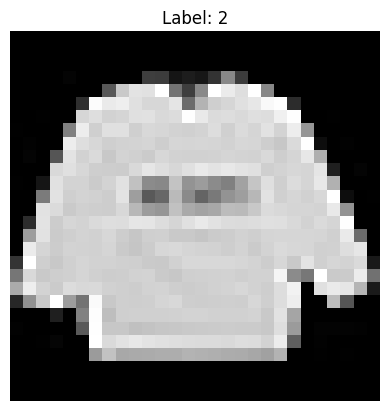

In [4]:
row = train_df.iloc[0]
label = row[0]
pixels = row[1:].values

# Reshape the pixels into a 28x28 image
image = pixels.reshape(28, 28)

# Display
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

## Decision Tree

In [5]:
X_train = train_df.drop(columns=["label"])
y_train = train_df["label"]

X_test = test_df.drop(columns=["label"])
y_test = test_df["label"]

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [7]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import plot_tree

y_pred = tree.predict(X_test)

print("Absolute error:", (y_test != y_pred).sum())
print("Accuracy:", accuracy_score(y_test, y_pred))

print("F1-scores (macro):", f1_score(y_test, y_pred, average='macro'))
print("F1-scores (weighted):", f1_score(y_test, y_pred, average='weighted'))

Absolute error: 2020
Accuracy: 0.798
F1-scores (macro): 0.7981136474568917
F1-scores (weighted): 0.7981136474568918


### 10 fold validation

In [8]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=8)

print("Scores for each fold:", scores)
print("Average accuracy:", scores.mean())

Scores for each fold: [0.79416667 0.793      0.79166667 0.79683333 0.79116667 0.7945
 0.79466667 0.7945     0.79233333 0.79066667]
Average accuracy: 0.79335


Honestly, bad but for less than one minute on training on a laptop I think it's pretty ok. That will be a baseline anyway.

## Multi layer perceptron

In [9]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=300, random_state=0)

# Train it
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8695
